In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib_venn import venn3
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# Question 1: Function to Check Partition
Write a Python function to check if a given list of sets is a partition of a universal set. The function should take the universal set and the list of sets as arguments and verify the following conditions:
1. The union of all subsets in the list equals the universal set.
2. The subsets are pairwise disjoint.

Write your function and test it with an example.

In [2]:
def isPartition(universalSet, listOfSets):
    # making numpy arrays of the universal and list of sets
    universalArray = np.array(list(universalSet))
    subsetArray = [np.array(list(subset)) for subset in listOfSets]

    #Checking if the subsets are disjoint
    for i in range(len(subsetArray)-1):
        for j in range(i+1, len(subsetArray)):
            if np.intersect1d(subsetArray[i], subsetArray[j]).size > 0: #if the intersection is not null, then return false, as they are not disjoint
                return False
            
    # Now checking if the union of all subsets is the universal set
    unionSet = np.concat(subsetArray)
    unionSet = np.unique(unionSet) #Made a union of all the sets in an array and kept only unique values

    return list(unionSet) == list(universalArray)



In [3]:
universal = {1, 2, 3, 4, 5, 6}
subsets = [{1, 2}, {3, 4}, {5, 6}]

print(isPartition(universal, subsets))

True


In [4]:
invalidSubsets = [{1, 2}, {2, 3}, {4, 5, 6}]
print(isPartition(universal, invalidSubsets))

False


# Question 2: Laws
With an example numpy array corresponding to set A, B, C, show the distributive properties and De Morgan's Laws. Also, use venn3 from matplotlib_venn library for vizualization.

(A ∩ (B ∪ C) == (A ∩ B) ∪ (A ∩ C)): True
(A ∪ (B ∩ C) == (A ∪ B) ∩ (A ∪ C)): True
De Morgan's Law 1: ¬(A ∪ B) == ¬A ∩ ¬B: True
De Morgan's Law 2: ¬(A ∩ B) == ¬A ∪ ¬B: True


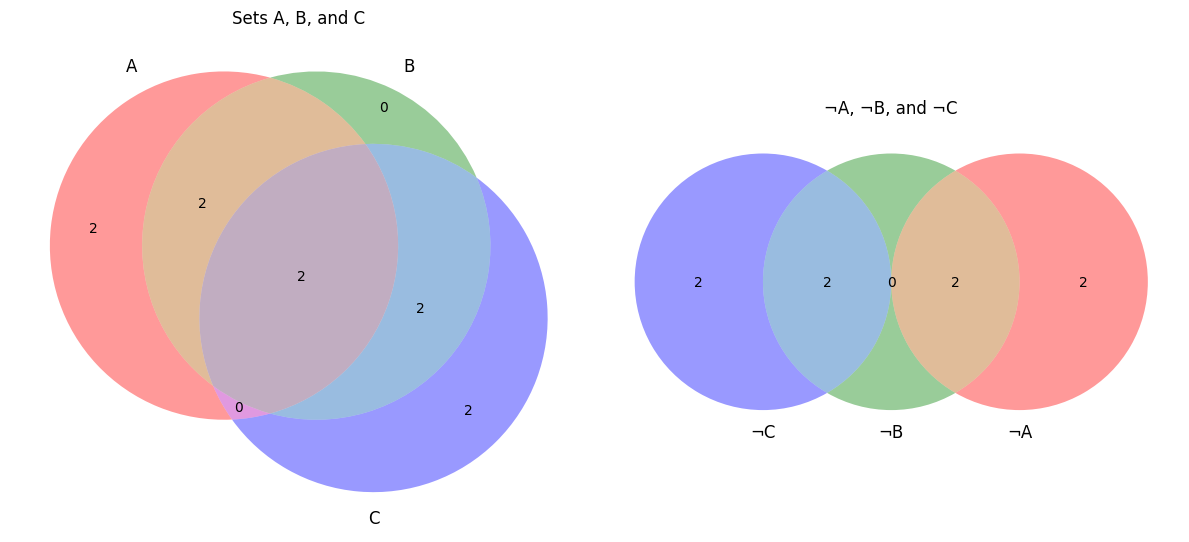

In [ ]:
# Define sets A, B, and C as numpy arrays
a = np.array([1, 2, 3, 4, 5, 10])
b = np.array([3, 4, 5, 6, 7, 10])
c = np.array([5, 6, 7, 8, 9, 10])

# Convert to sets for set operations
setA = set(a)
setB = set(b)
setC = set(c)

# Distributive laws
distributive1 = (setA & (setB | setC)) == ((setA & setB) | (setA & setC))
distributive2 = (setA | (setB & setC)) == ((setA | setB) & (setA | setC))

# De Morgan's laws
universalSet = set(range(1, 11))  # Define a universal set (1 to 10 for this example)
notA = universalSet - setA
notB = universalSet - setB
notC = universalSet - setC

deMorgan1 = (universalSet - (setA | setB)) == (notA & notB)
deMorgan2 = (universalSet - (setA & setB)) == (notA | notB)

# Print results
print("(A ∩ (B ∪ C) == (A ∩ B) ∪ (A ∩ C)):", distributive1)
print("(A ∪ (B ∩ C) == (A ∪ B) ∩ (A ∪ C)):", distributive2)
print("De Morgan's Law 1: ¬(A ∪ B) == ¬A ∩ ¬B:", deMorgan1)
print("De Morgan's Law 2: ¬(A ∩ B) == ¬A ∪ ¬B:", deMorgan2)

# Visualization with venn3
plt.figure(figsize=(12, 6))

# Venn diagram for A, B, C
plt.subplot(1, 2, 1)
venn3([setA, setB, setC], ('A', 'B', 'C'))
plt.title("Sets A, B, and C")

# Venn diagram for ¬A, ¬B and ¬C
plt.subplot(1, 2, 2)
venn3([notA, notB, notC], ('¬A', '¬B', '¬C'))
plt.title("¬A, ¬B, and ¬C")

plt.tight_layout()
plt.show()


# Question 3: Union and Intersection of Students
For below code:
1. The union of all sets of students present across the three subjects.
2. The intersection of all sets of students present across the three subjects.

```python
import pandas as pd
# Dictionary of marks
marks = {
    "Math": {"Alice": 85, "Bob": 90, "Charlie": 78},
    "Physics": {"Bob": 88, "Charlie": 92, "David": 75},
    "Chemistry": {"Alice": 82, "Charlie": 80, "Eve": 91},
}


# Convert the dictionary to a DataFrame
df = pd.DataFrame(marks).T
```

In [ ]:
import pandas as pd
# Dictionary of marks
marks = {
    "Math": {"Alice": 85, "Bob": 90, "Charlie": 78},
    "Physics": {"Bob": 88, "Charlie": 92, "David": 75},
    "Chemistry": {"Alice": 82, "Charlie": 80, "Eve": 91},
}


# Convert the dictionary to a DataFrame
df = pd.DataFrame(marks).T
df

,Alice,Bob,Charlie,David,Eve
Math,85.0,90.0,78.0,NaN,NaN
Physics,NaN,88.0,92.0,75.0,NaN
Chemistry,82.0,NaN,80.0,NaN,91.0


In [ ]:
df['Alice']

Math         85.0
Physics       NaN
Chemistry    82.0
Name: Alice, dtype: float64

In [ ]:
math_students = set(df.loc['Math'].dropna().index)
physics_students = set(df.loc['Physics'].dropna().index)
chem_students = set(df.loc['Chemistry'].dropna().index)

In [ ]:
math_students.union(physics_students, chem_students) # union of sets

{'Alice', 'Bob', 'Charlie', 'David', 'Eve'}

In [ ]:
math_students.intersection(physics_students, chem_students) # intersection of sets|

{'Charlie'}

# Question 4
Implement a Python function to compute the cartesian product of two sets A and B without using Python's built-in functions or libraries like itertools. The function should return the cartesian product as a set of ordered pairs (tuples).

In [5]:
def cartesianProduct(set1,set2):

    #initialising an empty set to hold the returning set
    cartProd = set()
    
    for i in set1:
        for j in set2:
            cartProd.add((i,j))

    return cartProd



In [6]:
a = {1,243,5,466,6,75,34,564}
b = {54,6}

print(cartesianProduct(a,b))

{(75, 6), (5, 54), (75, 54), (564, 54), (34, 6), (466, 6), (564, 6), (243, 54), (34, 54), (466, 54), (243, 6), (5, 6), (6, 6), (1, 6), (6, 54), (1, 54)}
